<a href="https://colab.research.google.com/github/sergiobm3/ESI_MachineLearning/blob/main/SSJ_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> We are team SSJ and our Data Distribution is Iquitos 2002 - 2005
.

---

We are going to use the data of the competition of prediction of the data of the Dengue. More information at this [link](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

The purpose of this notebook is to become comfortable with basic operations and pre-process the data.

# Setting Preliminares
Prior to starting any analysis, it is necessary to ensure that the basic and general purpose libraries (numpy, pandas, etc.) are correctly imported.

In [1]:
# General
from google.colab import files
import pandas as pd
import io
import numpy as np

#Plot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Dimensionality reduction
from sklearn.decomposition import PCA

# Clustering Execution
from sklearn import metrics
from random import randint
from sklearn.cluster import KMeans, DBSCAN

#3. Hierarchical Clustering
from sklearn import neighbors
from scipy.cluster import hierarchy


# Loading Data

We start by loading our data file, in our case it's in CSV format.

For this purpose, we use some commands provided by Google Colab itself to access files on our computer.

Once we have loaded the CSV file, we will use the Python Pandas library, which will help us to load the data in a structure that allows us to handle our data easily.

In [2]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

iq = upload_files(['city', 'year', 'weekofyear'])
iq

Saving dengue_features_train (3).csv to dengue_features_train (3).csv
User uploaded file "dengue_features_train (3).csv" with length 287139 bytes


week_start_date  ...  station_precip_mm
city year weekofyear                  ...                   
sj   1990 18              1990-04-30  ...               16.0
          19              1990-05-07  ...                8.6
          20              1990-05-14  ...               41.4
          21              1990-05-21  ...                4.0
          22              1990-05-28  ...                5.8
...                              ...  ...                ...
iq   2010 21              2010-05-28  ...               27.0
          22              2010-06-04  ...               36.6
          23              2010-06-11  ...                7.4
          24              2010-06-18  ...               16.0
          25              2010-06-25  ...               20.4

[1456 rows x 21 columns]

# Preprocessing 


In this step we will carry out actions that will allow us to obtain the data with which we will work and improve its appearance so that it is more comfortable to work with them.

For example, it is important to remove redundancy. For example, week_start_date could be inferred from weekofyear and year.


In [3]:
iq.drop("week_start_date", axis = 1, inplace = True)
iq.head()

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
city year weekofyear                      ...                                       
sj   1990 18          0.122600  0.103725  ...                20.0               16.0
          19          0.169900  0.142175  ...                22.2                8.6
          20          0.032250  0.172967  ...                22.8               41.4
          21          0.128633  0.245067  ...                23.3                4.0
          22          0.196200  0.262200  ...                23.9                5.8

[5 rows x 20 columns]

At this point, we must know that we are working on the complete dataset, however, we will only work with the data of the city of Iquitos from 2002 to 2005, both included.

In [4]:
# Subconjunto extraido por reglas. MEJOR ASÍ PORQUE DESAPARECE EL WARNING DEL MEAN ABAJO!!!!!!
iq = iq.loc['iq']
iq = iq.loc[2002:2005]

iq

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
year weekofyear                      ...                                       
2002 1           0.405729  0.348400  ...                23.0               45.3
     2           0.327583  0.375917  ...                21.0                7.1
     3           0.241086  0.145650  ...                22.0                5.0
     4           0.104129  0.148329  ...                21.0               18.0
     5                NaN       NaN  ...                20.8              120.2
...                   ...       ...  ...                 ...                ...
2005 47          0.282571  0.220600  ...                21.8                5.1
     48          0.317814  0.302700  ...                21.7               77.9
     49          0.358586  0.219486  ...                21.5               54.1
     50          0.198443  0.194100  ...                22.3                6.0
     51          0.180575  0.141333  ...                22.9               81.1

[208 rows x 20 columns]

The next step is to check if there is any missing value in our data. The existence of lost values will make future work difficult.

In [5]:
pd.isnull(iq).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

We have verified that there are missing values in our dataset, therefore, we must complete those missing data. But the big question is which method to use to complete them.

We will use the dataframe.mean() method, thanks to it we will fill in these empty values with the mean of the rest of the values of that column.

In [6]:
iq.fillna(iq.mean(), inplace=True)
pd.isnull(iq).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

# Dimensionality Reduction


##Correlation


We are going to observe the correlation between the variables in our dataset.

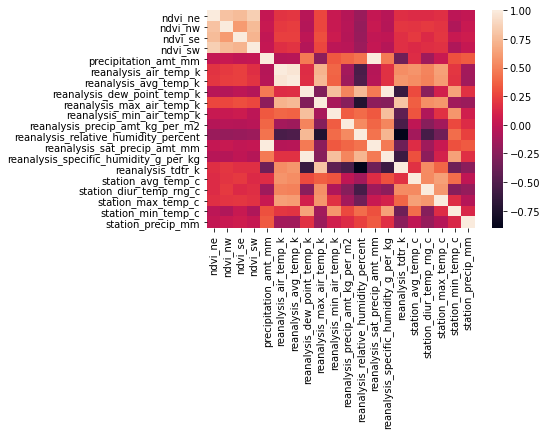

In [61]:
mtx_corr = iq.corr()
# plot the heatmap and annotation on it
sns.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)


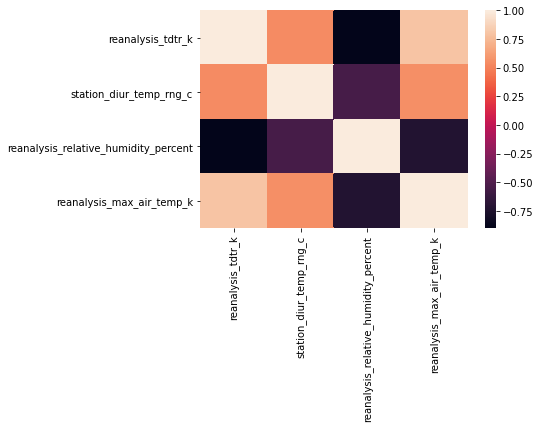

In [60]:
mtx_corr = iq[selected_features].corr()
# plot the heatmap and annotation on it
sns.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)

In [27]:
#features interesantes: station_diur_temp_rng_c, reanalysis_specific_humidity_g_per_kg, 
#selected_features = ['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k',
                     #'station_avg_temp_c','station_min_temp_c']
# Caracteristicas menos correlacionadas
'''selected_features = ['reanalysis_tdtr_k', 'reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 
                     'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg' ]'''
''' Las que habia antes
selected_features = ['reanalysis_air_temp_k','reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','reanalysis_relative_humidity_percent',
                     'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_diur_temp_rng_c']

'''
selected_features = ['reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'reanalysis_relative_humidity_percent', 'reanalysis_max_air_temp_k']

In [ ]:
### ESTO SOLO DE PRUEBA POR SI QUEREMOS VER LA TABLA DE ARRIBA. ESTO HAY QUE BORRARLO.

#iq.drop(columns= ["ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw","precipitation_amt_mm","station_precip_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_avg_temp_k","station_avg_temp_c","station_max_temp_c","station_min_temp_c","reanalysis_max_air_temp_k","reanalysis_max_air_temp_k"], axis = 1, inplace = True)
iq.drop(columns= ["ndvi_ne","ndvi_nw","ndvi_se","reanalysis_air_temp_k", "reanalysis_avg_temp_k"], axis = 1, inplace = True)

#iq.drop(columns= ["precipitation_amt_mm"], axis = 1, inplace = True)

Of all the variables that our dataset has, we have chosen a subset of them. When choosing these variables, we have given priority to the least correlated variables, because variables that are highly correlated do not provide information because they are redundant.



## Principal Component Analysis
Then, we have to obtain the results of the Principal Component Analysis

**2. PCA Estimation**

First, we construct the analyzer with its parameters (number of components) and then, we obtain the pca projection by using the method fit_transform.

Then, we show the percentage of variance explained by each of the selected components.

In PCA each principal component has certain variance, that all together add up to 100% of the total variance.

For each principal component, a ratio of its variance to the total variance is called the "proportion of explained variance"

Then , the following table of features and components show how components are linearly related with the different features (Note: each coefficient represents the correlation between a particular pair of component and feature)

> NOTE: If your features are correlated (as they typically are in real life) then each principal component will tend to include contributions from all features, and individual features could well be included in all principal components



**3. Plot**

Finally, PCA finds a new coordinate system in which every point has a new (x,y) value. The axes don't actually mean anything physical; they are chosen to give one axes the best of variation.

> NOTE: Be careful with the axes with introducing numbers and labels inside the chart

The first step is to normalize the data. For this we can use MinMaxScaler or StandardScaler.

DEBERIAMOS DE DECIDIRNOS POR UNO EXPLICANDO EL PORQUE: Yo dejaría StandardScaler porque normaliza los datos para tener media de 0 y desviación tipica 1, y porque lo usa el profesor tambien no nos vamos a engañar.

In [35]:
# performin min-max scaling each continuous feature column to the range [0, 1]

scaler = StandardScaler()  #@param ["MinMaxScaler()", "StandardScaler()"] {type:"raw"}


datanorm = scaler.fit_transform(iq[selected_features])
#datanorm = scaler.fit_transform(iq) ### prueba
#datanorm # Innecesario imprimir

Now we are going to obtain the main components, for this, we execute PCA.


In [36]:
pca = PCA ()
X_pca = pca.fit_transform(datanorm)
X_pca.shape

(208, 4)

Now the variance percentage of each of the selected components is shown.

The sum of the variances of the set of principal components must add up to 100% of the total variance.

The relationship between the variance and the total variance of each principal component is called the "proportion of explained variance."

In [37]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[3.07006574 0.56806147 0.29189877 0.08929769]
[0.76382645 0.1413326  0.07262385 0.02221709]
[0.76382645 0.90515905 0.97778291 1.        ]


Then, we show the percentage of 
variance explained by each of the components.
 

In [38]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

The explained variance ratio per PC is acceptable. The X-axis representing almost 95% of the variability of the data set. ESTO HAY QUE CAMBIARLO


Now, PCA finds new coordinates for each point. The axes that are represented are used to give an axis the greatest variation.

In [39]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1])

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = str(iq.iloc[i,:].name))
fig.show()

In [ ]:
#@title Number of components {run: "auto"}
n_components = 2 #@param { type: "slider", min: 1, max: 17, step: 1}

In [ ]:
X_pca = PCA (n_components = n_components ).fit_transform(datanorm)

# Clustering by K-means

The k-means algorithm is based on the idea that a central point can represent a group, this point is called the centroid.

The k-means algorithm looks for centroids that can represent a group of points, a centroid is a central point that represents the mean or median of a group of points.

We have chosen to group the project data by PCA.

In [40]:
# Plot
def plot_pca(X_pca, labels, title):
    colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
    colors = np.hstack([colors] * 20)
    numbers = np.arange(len(X_pca))
    fig, ax = plt.subplots()
    for i in range(len(X_pca)):
        plt.text(X_pca[i][0], X_pca[i][1], numbers[i], color=colors[labels[i]]) 
    plt.xlim(np.min(X_pca[:])-0.5, np.max(X_pca[:])+0.5)
    plt.ylim(np.min(X_pca[:])-0.5, np.max(X_pca[:])+0.5)
    plt.title(title)
    ax.grid(True)
    fig.tight_layout()
    plt.show()

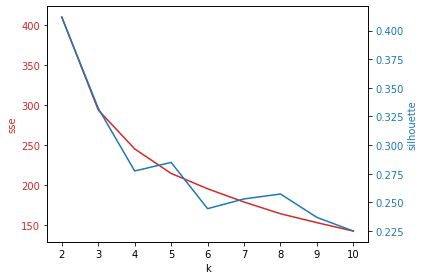

In [41]:
# Setting parameters 

# kmeans parameters

## initialization method 
init = "random" #@param ["random", "k-means++"]

## to run 10 times with different random centroids to choose the final model as the one with the lowest SSE
iterations = 10 #@param {type:"slider", min:0, max:100, step:1} 

## maximum number of iterations for each single run
max_iter = 300 #@param {type:"slider", min:10, max:500, step:1} 

## controls the tolerance with regard to the changes in the within-cluster sum-squared-error to declare convergence
tol = 0.0001 #@param {type:"slider", min:0.0001, max:0.001, step:0.0001}

random_state = 0 # random


distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol, random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

import matplotlib.pyplot as plt

x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [42]:
# Clustering execution
## from previous pictures but it is not easy to choose
k = 3 #@param {type:"slider", min:0, max:100, step:1}  

In [43]:
# Random inicialization
print ("Number of clusters", k)
km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)


Number of clusters 3


And we're going to visualize the results.

First, the labels (assigned group) assigned to each point

In [44]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.332
Distortion: 293.76


In [45]:
km.labels_

array([2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

And plot the results using the PCA data

In [46]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = km.labels_)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = str(iq.iloc[i,:].name))
fig.show()

# Outlier Identification

Density-based clustering algorithms cluster in areas with high data density. And they use the low-density areas to separate between the different groups. One such algorithm is DBSCAN. In DBSCAN the center points have a neighborhood area for a given radius that has at least a minimum number of points.

## DBSCAN: Setting Parameters


To obtain the epsilon for use in DBSCAN, we plot the shortest distance to the neighbor. We set the minimum number of points to 6 since we understand that this results in a dense area.

Now, we graph a similarity / distance matrix.

In [47]:
# 3.1. Compute the similarity matrix

dist = neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(datanorm)

# 3.1.1 Visualization

fig = px.imshow(matsim)
fig.show()

Now we are going to calculate the distance of each point to its neighbors.



In [48]:
minPts=6

A = neighbors.kneighbors_graph(datanorm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(datanorm):
    for j in range(len(datanorm)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
   
seq.sort()

fig = px.line(x=np.arange(0, len(seq), 1), y=seq)
fig.show()

We will test different clusters from 1.00 to 2.20, with intervals of 0.10. DBSCAN will return the number of clusters and the outliers found in those intervals.

In [49]:
results = []
for eps in np.arange(0.50, 2.20, 0.10):
  db = DBSCAN(eps, min_samples=minPts).fit(datanorm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  results.append([eps, n_clusters_, n_outliers])

#print results
from tabulate import tabulate
print(tabulate(results, headers = ("eps", "clusters", "outliers")))


  eps    clusters    outliers
-----  ----------  ----------
  0.5           3         121
  0.6           2          78
  0.7           2          55
  0.8           2          27
  0.9           1          19
  1             1          11
  1.1           1           9
  1.2           1           7
  1.3           1           6
  1.4           1           5
  1.5           1           5
  1.6           1           2
  1.7           1           2
  1.8           1           1
  1.9           1           0
  2             1           0
  2.1           1           0


## DBSCAN: Execution

DBSCAN has grouped the items into two groups and the rest are outliers. The outliers are represented by -1, and the elements of the two groups by 0 and 1.

In [57]:
db = DBSCAN(eps=0.8, min_samples=minPts).fit(datanorm)
labels = db.labels_
labels

array([ 0,  1,  1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,
        1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  1,  1,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  1, -1,  0,  0, -1,  0,  1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])

In [70]:
iq[selected_features]['group'] = labels
iq[selected_features][iq['group'] == -1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



reanalysis_tdtr_k  ...  reanalysis_max_air_temp_k
year weekofyear                     ...                           
2002 10                   8.971429  ...                      308.8
     16                   6.728571  ...                      305.0
     26                  10.728571  ...                      305.3
     32                  13.457143  ...                      308.0
     33                  14.385714  ...                      308.9
     37                  14.042857  ...                      310.0
     38                  16.028571  ...                      311.2
     39                  13.171429  ...                      312.6
     40                  13.757143  ...                      313.2
2003 13                   9.471429  ...                      308.1
     30                  11.428571  ...                      305.4
     43                   9.957143  ...                      311.2
2004 5                   13.642857  ...                      309.7
     6                   14.085714  ...                      309.8
     8                    9.728571  ...                      310.1
     21                   9.100000  ...                      308.2
     24                   5.042857  ...                      300.0
     27                   8.457143  ...                      304.4
     39                  13.200000  ...                      309.8
     44                  12.314286  ...                      312.3
2005 29                  13.514286  ...                      307.7
     30                  10.085714  ...                      306.3
     33                  14.200000  ...                      310.5
     36                  13.714286  ...                      309.3
     39                  14.828571  ...                      314.0
     40                  12.357143  ...                      312.7
     41                  11.685714  ...                      313.2

[27 rows x 4 columns]

Visualization

In [58]:
#plotting orginal points with color related to label
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = labels)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = str(iq.iloc[i,:].name))
fig.show()

Outlier Identification

We can also assess the quality the clustering result using the [silohouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) that in this case to be so concentrated data is not a good result, giving very similar for datanorm as for X_pca.

It is evident that here there is a high correlation of variables.

# Hierarchical Clustering Algorithm

Hierarchical grouping algorithms generate a structure of groups organized in the form of a hierarchical tree, called dendrograms, which help to understand how the groups are related to each other. The top node of the tree encompasses all the elements and the leaf nodes will represent elements with maximum similarity.

Since the data is so concentrated and the rest seems outlier it is best not to use Single-Link.

The options would range from Complete-Link to Ward.

The Complete-Link will allow us to break up the big groups.

The result of Complete-Link can give us up to five groups.

Although here the cut more than linear would have to be done ad-hoc, that is to say from a cut with more granularity (more groups) we should then regroup clusters that are very similar between them.

Anyway we are going to cut by a logical level despite giving us a few outliers (groups of a single element)

**Interpretation**

Now we can graph again the PCA data but introducing as color the results of the labels (be careful with the margins).

You can see that the clustering has not been bad at all!, the results are coherent.

Distancia Media	  2.49


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



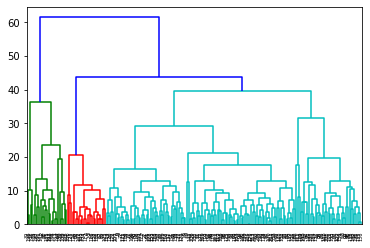

Number of clusters 3


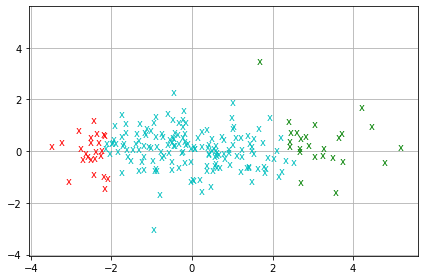

In [83]:
#3. Hierarchical Clustering
# 3.1. Compute the similarity matrix

metric = "euclidean"           #@param ["euclidean", "manhattan", "chebyshev"]   
method_name = "complete"           #@param [ "single", "complete", "average", "weighted","centroid", "median", "ward"]   
#@title Number cut !!! ad-hoc
cut =   40# @param {type:"slider", min:1, max:100, step:1} 

dist = neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(datanorm)
avSim = np.average(matsim)
print("%s\t%6.2f" % ('Distancia Media', avSim))


# 3.2. Building the Dendrogram	


clusters = hierarchy.linkage(matsim, method = method_name) 
hierarchy.dendrogram(clusters, color_threshold=cut) # buscar corte
plt.show()

# more method in this web: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html


labels = hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels))))

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()

for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colors[labels[i]])  

plt.xlim(np.min(X_pca[:])-0.5, np.max(X_pca[:])+0.5)
plt.ylim(np.min(X_pca[:])-0.5, np.max(X_pca[:])+0.5)

ax.grid(True)
fig.tight_layout()
plt.show()

Cuaderno chulo: https://colab.research.google.com/drive/1MmRvVm1msHCIaB1luZCd2rf2F0jNz5Zj?usp=sharing


In [86]:
# tratamos el cluster -1 como cluster de outliers
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(datanorm, labels))

# And now we look for the characterization of each of the groups, for this we take into account the results of clustering (the variable labels)
labels = hierarchy.fcluster(clusters, cut , criterion = 'distance')

iq['group'] = labels

res = iq.groupby(('group')).size()

res



Estimated number of clusters: 3
Silhouette Coefficient: 0.236


group
1     25
2     24
3    159
dtype: int64

In [87]:
iq[selected_features]['group'] = labels
iq[selected_features][iq['group'] == -1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,reanalysis_tdtr_k,station_diur_temp_rng_c,reanalysis_relative_humidity_percent,reanalysis_max_air_temp_k
year,weekofyear,,,,


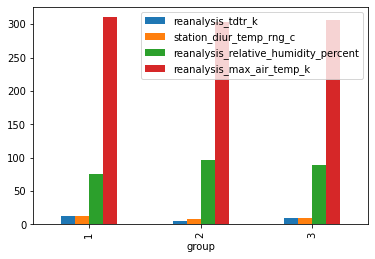

In [88]:
iq['group'] = labels


res = iq[['reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'reanalysis_relative_humidity_percent', 'reanalysis_max_air_temp_k', 'group']].groupby(('group')).mean()
res.plot(kind='bar', legend=True)
